In [145]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from scipy.spatial import distance_matrix

In [80]:
df = pd.read_csv("HW2-data/IE582_Fall21_HW2_q1_data.csv")
df.head()

,X1,X2,class
0,0.569483,0.822003,a
1,0.411469,0.911424,a
2,0.417385,-0.908730,a
3,-0.791828,0.610745,a
4,-0.806777,-0.590857,a


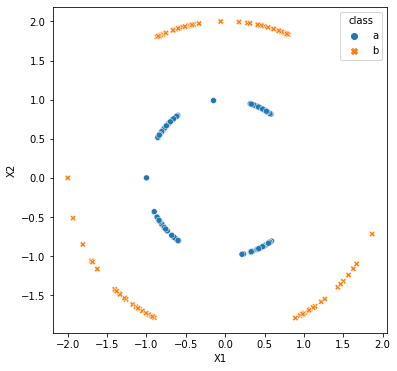

In [81]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="X1",y="X2", hue="class", style="class", data=df);

### a) Apply PCA and Visualize

In [110]:
df_class = df["class"].copy()
df_numeric = df.select_dtypes(["int64","float64"])

pca = PCA(1)
df_pca = pd.DataFrame(pca.fit_transform(df_numeric), columns=["pc1"])
df_pca.head()

,pc1
0,0.722069
1,0.811347
2,-1.008801
3,0.509578
4,-0.692037


In [111]:
df_pca["class"] = df_class
df_pca["observation_no"] = df_pca.index

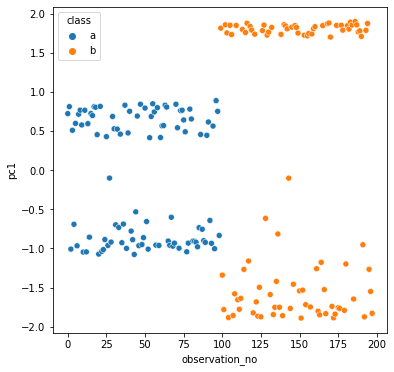

In [113]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = "observation_no", y = "pc1", hue="class", data=df_pca);

### b) Apply MDS and Visualize (at least two different similarity measures)

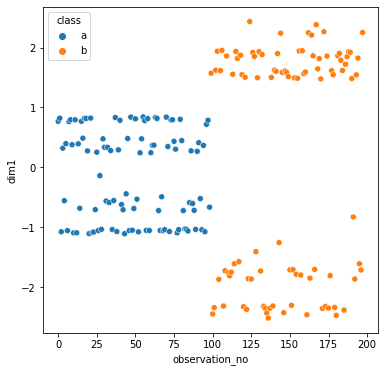

In [123]:
# Euclidean Distance
mds = MDS(n_components = 1, n_jobs=-1, dissimilarity="euclidean")
df_mds = pd.DataFrame(mds.fit_transform(df_numeric), columns=["dim1"])

df_mds["class"] = df_class
df_mds["observation_no"] = df_mds.index
plt.figure(figsize=(6,6))
sns.scatterplot(x= "observation_no", y= "dim1", hue="class", data=df_mds);

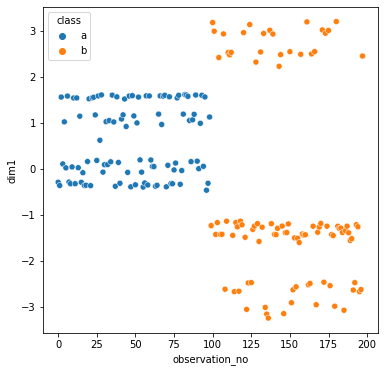

In [133]:
# Manhattan Distance
d_matrix = distance_matrix(df_numeric, df_numeric, p=1) # Create a distance matrix using manhattan distance

mds_2 = MDS(n_components = 1, n_jobs=-1, dissimilarity="precomputed")
df_mds_2 = pd.DataFrame(mds_2.fit_transform(d_matrix), columns=["dim1"])

df_mds_2["class"] = df_class
df_mds_2["observation_no"] = df_mds_2.index
plt.figure(figsize=(6,6))
sns.scatterplot(x= "observation_no", y= "dim1", hue="class", data=df_mds_2);

### c)

### d)

In [135]:
df_copy = df.copy()
df_copy["X1sq"] = df["X1"]*df["X1"]
df_copy["X2sq"] = df["X2"]*df["X2"]
df_copy["X1timesX2"] = df["X1"]*df["X2"]

df_copy.head()

,X1,X2,class,X1sq,X2sq,X1timesX2
0,0.569483,0.822003,a,0.324311,0.675689,0.468117
1,0.411469,0.911424,a,0.169307,0.830693,0.375023
2,0.417385,-0.908730,a,0.174210,0.825790,-0.379290
3,-0.791828,0.610745,a,0.626991,0.373009,-0.483604
4,-0.806777,-0.590857,a,0.650889,0.349111,0.476689


# Task 2

In [172]:
turkey_dist = pd.read_excel("HW2-data/ilmesafe.xls", header=2, index_col=1)
df_tr = turkey_dist.copy()
df_tr = df_tr.fillna(0)
plakalar = df_tr.drop(["İL PLAKA NO"], inplace=True, axis=1)
df_tr.head()

,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
İL ADI,,,,,,,,,,,,,,,,,,,,,
ADANA,0.0,335.0,575.0,966.0,603.0,567.0,535.0,1035.0,874.0,903.0,...,621.0,709.0,782.0,1042.0,1066.0,899.0,714.0,246.0,87.0,735.0
ADIYAMAN,335.0,0.0,910.0,648.0,632.0,814.0,870.0,751.0,1209.0,1238.0,...,303.0,471.0,1023.0,758.0,748.0,1147.0,955.0,210.0,248.0,976.0
AFYONKARAHİSAR,575.0,910.0,0.0,1318.0,597.0,300.0,290.0,1243.0,345.0,328.0,...,1196.0,1284.0,515.0,1351.0,1461.0,338.0,447.0,821.0,662.0,375.0
AĞRI,966.0,648.0,1318.0,0.0,738.0,1141.0,1428.0,396.0,1640.0,1569.0,...,369.0,430.0,1175.0,310.0,143.0,1363.0,1106.0,814.0,879.0,1192.0
AMASYA,603.0,632.0,597.0,736.0,0.0,413.0,825.0,695.0,938.0,831.0,...,796.0,982.0,437.0,783.0,881.0,625.0,368.0,639.0,608.0,454.0


In [171]:
mds = MDS(n_components = 2, n_jobs=-1, dissimilarity="precomputed")
df_tr_mds = pd.DataFrame(mds.fit_transform(df_tr), columns=["h","v"])

df_tr_mds["plaka"] = plakalar
df_tr_mds["city_name"] = df_tr_mds.index
plt.figure(figsize=(6,6))
sns.scatterplot(x= "h", y= "v", data=df_mds);

ValueError: Array must be symmetric

# Task 3